In [159]:
import cPickle
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
import PIL.Image as Image

In [ ]:
color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

In [773]:
data_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/data29.pkl'
label_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/label29.pkl'
data = cPickle.load(open(data_file, 'r'))
label = cPickle.load(open(label_file, 'r'))

In [774]:
im = data[0].asnumpy()[0]
im = im.transpose((1,2,0))
im = im.astype(np.uint8)

In [775]:
im.shape

(800, 1333, 3)

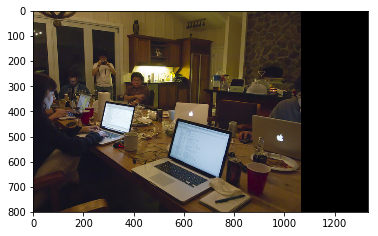

In [776]:
plt.imshow(im)

In [777]:
roi1 = data[1].asnumpy()[0][:,1:]
roi2 = data[2].asnumpy()[0][:,1:]
roi3 = data[3].asnumpy()[0][:,1:]
roi4 = data[4].asnumpy()[0][:,1:]
roi = roi1 + roi2 + roi3 + roi4
print roi.shape

(256, 4)


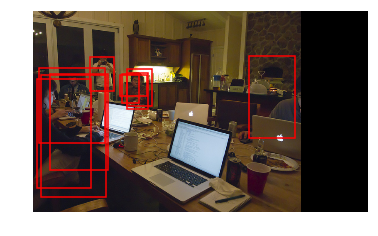

In [778]:
plt.imshow(im)

for i in range(10):
    bbox = roi[i]
    linewidth = 1.5
    color = 'r'
    bbox = roi[i]
    rect = plt.Rectangle((bbox[0], bbox[1]),
                         bbox[2] - bbox[0],
                         bbox[3] - bbox[1], fill=False,
                         edgecolor=color, linewidth=linewidth)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()

In [779]:
keypoints = label[3].asnumpy()[0]
print keypoints.shape

(128, 17)


In [780]:
def decode_kp(kp_label, bbox):
    if kp_label == -1:
        return 0, 0
    x = int(kp_label) % 56
    y = int(kp_label) / 56
    
    x = bbox[0] + float(x) / 56.0 * (bbox[2] - bbox[0])
    y = bbox[1] + float(y) / 56.0 * (bbox[3] - bbox[1])
    return x, y

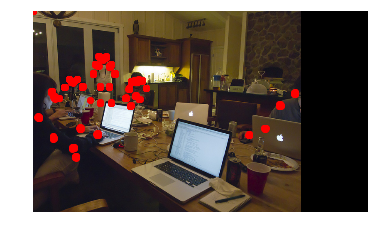

In [781]:
plt.imshow(im)
# im[:,::-1,:]
# ind = 26
for i in range(128):
    bbox = roi[i]
#     print bbox
    keypoint = keypoints[i]
#     print keypoint
    xs = np.zeros(17)
    ys = np.zeros(17)
    for k, kp in enumerate(keypoint):
        xs[k], ys[k] = decode_kp(kp, bbox)
#     print xs, ys
    plt.plot(xs, ys, 'ro')
        

plt.axis('off')
plt.show()

In [666]:
keypoints[0:50]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -

In [459]:
label[0].sum()


[27.]
<NDArray 1 @cpu(0)>

In [448]:
roi[0:20]

array([[ 370.34192 ,   68.309135, 1197.1897  ,  789.20844 ],
       [ 621.8633  ,  138.72339 , 1198.      ,  799.      ],
       [ 322.76236 ,   91.35123 , 1198.      ,  799.      ],
       [ 186.67004 ,  192.53479 , 1032.2526  ,  799.      ],
       [ 332.83173 ,  216.62592 ,  919.44904 ,  799.      ],
       [ 496.0921  ,  110.0388  , 1198.      ,  612.9839  ],
       [ 582.2334  ,   89.02475 , 1121.9363  ,  740.9863  ],
       [ 429.00522 ,  181.58398 , 1081.7584  ,  799.      ],
       [ 414.5772  ,   21.436798, 1198.      ,  562.79834 ],
       [ 279.5974  ,  123.789   , 1146.0555  ,  590.0161  ],
       [ 358.89716 ,   45.13977 ,  804.993   ,  799.      ],
       [ 505.69232 ,  212.5888  , 1198.      ,  698.76495 ],
       [ 508.5575  ,   93.311646, 1013.9226  ,  720.8167  ],
       [ 373.5604  ,  280.23962 , 1198.      ,  799.      ],
       [ 114.95892 ,  153.32126 , 1191.4094  ,  730.54333 ],
       [ 430.01248 ,   36.863678,  973.76587 ,  669.6387  ],
       [1111.1951  ,  18

In [275]:
bbox_target = data[1].asnumpy()[0]

In [277]:
bbox_target[100:200]

array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,  -1.6822796, 235.55911  , 495.00177  , 799.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.